In [37]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [38]:
colors = ["tab:blue", "tab:orange","tab:green","tab:purple","tab:brown","tab:pink"]

In [39]:
tensor_size = 128*26*26*4

In [40]:
jpeg_cha = pd.read_csv("../measurements/jpeg_snr_cha/characteristic.csv")
decom_cha = pd.read_csv("../measurements/decomposition_snr_cha/characteristic.csv")
reg_cha = pd.read_csv("../measurements/regression_snr_cha/characteristic.csv")
# sketch_cha = pd.read_csv("../measurements/sketchml/characteristic.csv")

jpeg_cha = jpeg_cha[jpeg_cha["sparsity"]>0]
decom_cha = decom_cha[decom_cha["sparsity"]>0]
reg_cha = reg_cha[reg_cha["sparsity"]>0]
# sketch_cha = sketch_cha[sketch_cha["sparsity"]>0]

In [41]:
jpeg_cha["ratio"] = tensor_size/jpeg_cha["datasize_est"]
decom_cha["ratio"] = tensor_size/decom_cha["datasize_est"]
# reg_cha["size_est"] = reg_cha["datasize_est"]-tensor_size/4*reg_cha["sparsity"]/4
# reg_cha["ratio"] = tensor_size/reg_cha["size_est"]
reg_cha["ratio"] = tensor_size/reg_cha["datasize_est"]
# sketch_cha["ratio"] = tensor_size/sketch_cha["datasize_est"]

In [42]:
jpeg_cha.head()

,pruning_thresh,quality,frame_id,sparsity,decomposability,regularity,pictoriality,datasize_est,datasize_real,reconstruct_evm,reconstruct_snr,ratio
0,0.05,60,1,0.658631,-0.517428,0.449159,0.834172,15168,15903,44.858193,6.963165,22.818565
1,0.05,60,2,0.470044,-0.994591,0.158644,0.326536,10829,11564,40.525261,7.845485,31.961585
2,0.05,60,3,0.461770,-0.998798,0.139178,0.222738,13395,14130,35.031224,9.110894,25.838895
3,0.05,60,4,0.450756,-0.999399,0.136039,0.188998,13199,13934,32.671545,9.716606,26.222593
4,0.05,60,5,0.448468,-1.000000,0.137985,0.218278,5817,6552,33.293734,9.552749,59.500086


In [43]:
plot_thresh = 0.3
plot_quality = 4
com_ratio_lim = 30

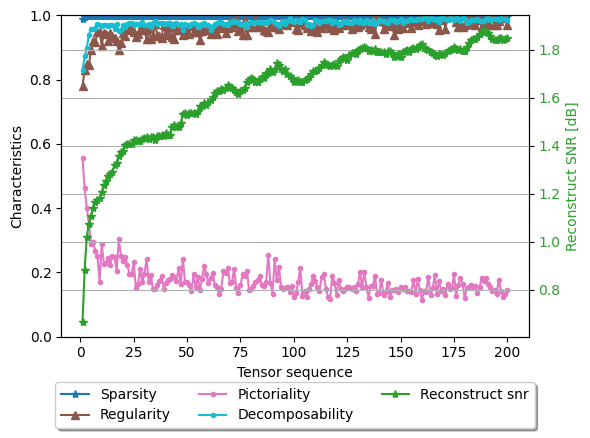

In [44]:
jpeg_group = jpeg_cha.groupby("pruning_thresh")
df_thr = jpeg_group.get_group(plot_thresh)
qual_group = df_thr.groupby("quality")
qual_key = list(qual_group.groups.keys())
df = qual_group.get_group(qual_key[plot_quality])

fig, ax1 = plt.subplots(figsize=(6, 4))
color = 'tab:blue'
ax1.set_xlabel('Tensor sequence')
ax1.set_ylabel('Characteristics')
ax1.plot(df["frame_id"],df["sparsity"],"*-",color="tab:blue", label="Sparsity")
ax1.plot(df["frame_id"],df["regularity"],"^-",color="tab:brown", label="Regularity")
ax1.plot(df["frame_id"],df["pictoriality"],".-",color="tab:pink", label="Pictoriality")
ax1.plot(df["frame_id"],df["decomposability"],".-",color="tab:cyan", label="Decomposability")
ax1.tick_params(axis='y')
ax1.set_ylim([0,1])
ax2 = ax1.twinx()  # instantiate a second Axes that shares the same x-axis

color = 'tab:green'
ax2.set_ylabel('Reconstruct SNR [dB]', color=color)  # we already handled the x-label with ax1
# ax2.plot(df["frame_id"],df["ratio"],"*-",color=color, label="Compression Ratio")
ax2.plot(df["frame_id"],df["reconstruct_snr"],"*-",color=color, label="Reconstruct snr")
ax2.tick_params(axis='y', labelcolor=color)
# ax2.set_ylim([0,com_ratio_lim])

fig.tight_layout()  # otherwise the right y-label is slightly clipped

fig.legend(loc='lower center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=True, ncol=3)
plt.grid()
plt.show()

<Figure size 600x400 with 0 Axes>

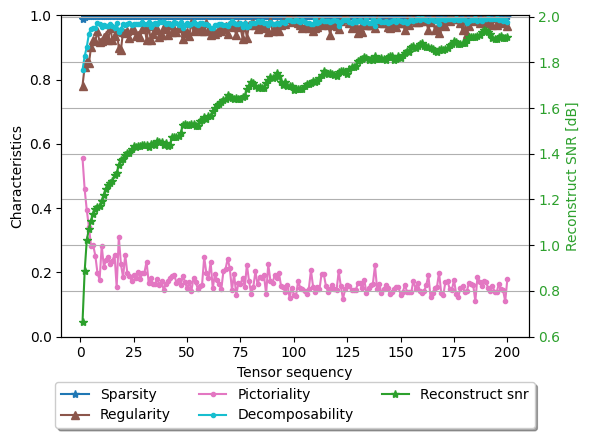

In [45]:
plt.figure(figsize=(6,4))
jpeg_group = reg_cha.groupby("pruning_thresh")
df_thr = jpeg_group.get_group(plot_thresh)
qual_group = df_thr.groupby("quality")
qual_key = list(qual_group.groups.keys())
df = qual_group.get_group(qual_key[plot_quality])
# print("Quality key = "+str(qual_key[0]))
# plt.plot(df["frame_id"],df["sparsity"],"*-",color=colors[0], label="Sparsity")
# # plt.plot(df["frame_id"],df["decomposability"],"*",color=colors[1], label="Decomposability")
# plt.plot(df["frame_id"],df["regularity"],"*-",color=colors[2], label="Regularity")
# plt.plot(df["frame_id"],df["pictoriality"],"*-",color=colors[3], label="Pictoriality")
# plt.legend()
# plt.grid()
# plt.xlabel("Tensor Index")
# plt.ylabel("Pictoriality")
fig, ax1 = plt.subplots(figsize=(6,4))
color = 'tab:blue'
ax1.set_xlabel('Tensor sequency')
ax1.set_ylabel('Characteristics')
ax1.plot(df["frame_id"],df["sparsity"],"*-",color="tab:blue", label="Sparsity")
ax1.plot(df["frame_id"],df["regularity"],"^-",color="tab:brown", label="Regularity")
ax1.plot(df["frame_id"],df["pictoriality"],".-",color="tab:pink", label="Pictoriality")
ax1.plot(df["frame_id"],df["decomposability"],".-",color="tab:cyan", label="Decomposability")
ax1.tick_params(axis='y')
ax1.set_ylim([0,1])
ax2 = ax1.twinx()  # instantiate a second Axes that shares the same x-axis

color = 'tab:green'
ax2.set_ylabel('Reconstruct SNR [dB]', color=color)  # we already handled the x-label with ax1
# ax2.plot(df["frame_id"],df["ratio"],"*-",color=color, label="Compression Ratio")
ax2.plot(df["frame_id"],df["reconstruct_snr"],"*-",color=color, label="Reconstruct snr")
ax2.tick_params(axis='y', labelcolor=color)
# ax2.set_ylim([0,com_ratio_lim])

fig.tight_layout()  # otherwise the right y-label is slightly clipped

fig.legend(loc='lower center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=True, ncol=3)
plt.grid()
plt.show()

<Figure size 600x400 with 0 Axes>

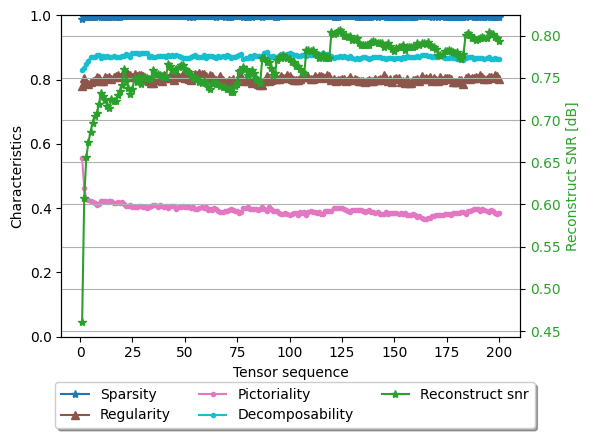

In [46]:
plt.figure(figsize=(6,4))
jpeg_group = decom_cha.groupby("pruning_thresh")
df_thr = jpeg_group.get_group(plot_thresh)
qual_group = df_thr.groupby("quality")
qual_key = list(qual_group.groups.keys())
df = qual_group.get_group(qual_key[plot_quality])
# print("Quality key = "+str(qual_key[0]))
# plt.plot(df["frame_id"],df["sparsity"],"*-",color=colors[0], label="Sparsity")
# # plt.plot(df["frame_id"],df["decomposability"],"*",color=colors[1], label="Decomposability")
# plt.plot(df["frame_id"],df["regularity"],"*-",color=colors[2], label="Regularity")
# plt.plot(df["frame_id"],df["pictoriality"],"*-",color=colors[3], label="Pictoriality")
# plt.legend()
# plt.grid()
# plt.xlabel("Tensor Index")
# plt.ylabel("Pictoriality")
fig, ax1 = plt.subplots(figsize=(6,4))
color = 'tab:blue'
ax1.set_xlabel('Tensor sequence')
ax1.set_ylabel('Characteristics')
ax1.plot(df["frame_id"],df["sparsity"],"*-",color="tab:blue", label="Sparsity")
ax1.plot(df["frame_id"],df["regularity"],"^-",color="tab:brown", label="Regularity")
ax1.plot(df["frame_id"],df["pictoriality"],".-",color="tab:pink", label="Pictoriality")
ax1.plot(df["frame_id"],df["decomposability"],".-",color="tab:cyan", label="Decomposability")
ax1.tick_params(axis='y')
ax1.set_ylim([0,1])
ax2 = ax1.twinx()  # instantiate a second Axes that shares the same x-axis

color = 'tab:green'
ax2.set_ylabel('Reconstruct SNR [dB]', color=color)  # we already handled the x-label with ax1
# ax2.plot(df["frame_id"],df["ratio"],"*-",color=color, label="Compression Ratio")
ax2.plot(df["frame_id"],df["reconstruct_snr"],"*-",color=color, label="Reconstruct snr")
ax2.tick_params(axis='y', labelcolor=color)
# ax2.set_ylim([0,com_ratio_lim])

fig.tight_layout()  # otherwise the right y-label is slightly clipped

fig.legend(loc='lower center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=True, ncol=3)
plt.grid()
plt.show()